## pandas CCTV 데이터 연습하기

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [4]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv',encoding='utf-8')
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
CCTV_Seoul.columns[3]

'2014년'

In [10]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'},inplace=True) #컬럼 이름변경시 사용됨
CCTV_Seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

### 인구분석 & 엑셀읽기

In [13]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',
                          encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [24]:
#행(머리)를 잘라낼수있다.,삭제는 아니다!! header=?
#컬럼을 잘라낼수있다.usecols='A'
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',
                          header=2,
                          usecols='B,D,G,J',
                          encoding='utf-8')
pop_Seoul.head(3)

,자치구,계,계.1,계.2
0,합계,10197604.0,9926968.0,270636.0
1,종로구,162820.0,153589.0,9231.0
2,중구,133240.0,124312.0,8928.0


In [27]:
pop_Seoul.rename(columns={
    pop_Seoul.columns[0]:'구별',
    pop_Seoul.columns[1]:'인구수',
    pop_Seoul.columns[2]:'한국인',
    pop_Seoul.columns[3]:'외국인'},
    inplace=True)

In [29]:
pop_Seoul.head()

,구별,인구수,한국인,외국인
0,합계,10197604.0,9926968.0,270636.0
1,종로구,162820.0,153589.0,9231.0
2,중구,133240.0,124312.0,8928.0
3,용산구,244203.0,229456.0,14747.0
4,성동구,311244.0,303380.0,7864.0


### 데이터 분석

In [33]:
CCTV_Seoul.sort_values(by='소계',ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [34]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+\
                      CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전']*100
CCTV_Seoul.sort_values(by='최근증가율',ascending='False').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2034,1843,142,30,467,34.671731
13,서대문구,962,844,50,68,292,48.578199
20,용산구,1624,1368,218,112,398,53.216374
5,광진구,707,573,78,53,174,53.228621
14,서초구,1930,1406,157,336,398,63.371266


In [36]:
#인덱스삭제
pop_Seoul.drop([0],inplace=True) #inplace는 원본이 바꿀때 항상쓰인다.
pop_Seoul.head()

,구별,인구수,한국인,외국인
1,종로구,162820.0,153589.0,9231.0
2,중구,133240.0,124312.0,8928.0
3,용산구,244203.0,229456.0,14747.0
4,성동구,311244.0,303380.0,7864.0
5,광진구,372164.0,357211.0,14953.0


In [40]:
pop_Seoul['구별'].unique() #array로 변경해준다-->unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [41]:
arr = pop_Seoul['구별'].unique()
print(arr)

['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구' nan]


In [43]:
pop_Seoul[pop_Seoul['구별'].isnull()] #비어있는 값을 찾아준다 --> isnull

,구별,인구수,한국인,외국인
26,NaN,NaN,NaN,NaN


In [44]:
pop_Seoul.drop([26],inplace=True)

In [45]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인
21,관악구,525515.0,507203.0,18312.0
22,서초구,450310.0,445994.0,4316.0
23,강남구,570500.0,565550.0,4950.0
24,송파구,667483.0,660584.0,6899.0
25,강동구,453233.0,449019.0,4214.0


In [47]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수']*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,외국인비율
1,종로구,162820.0,153589.0,9231.0,5.669451
2,중구,133240.0,124312.0,8928.0,6.700690
3,용산구,244203.0,229456.0,14747.0,6.038828
4,성동구,311244.0,303380.0,7864.0,2.526635
5,광진구,372164.0,357211.0,14953.0,4.017852


### 데이터프레임 병합

In [52]:
df1= pd.DataFrame({'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']},
                   index=[0,1,2,3]
                 )
df1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [54]:
df2= pd.DataFrame({'A':['A4','A5','A6','A7'],
                   'B':['B4','B5','B6','B7'],
                   'C':['C4','C5','C6','C7'],
                   'D':['D4','D5','D6','D7']},
                   index=[4,5,6,7]
                 )
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [55]:
#concat을 이용하여 병합!
result = pd.concat([df1,df2])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [59]:
result = pd.concat([df1,df2],keys=['x','y']) #key를 통해서 제어방법
print(result)
result.index #2차원배열생성

      A   B   C   D
x 0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3
y 4  A4  B4  C4  D4
  5  A5  B5  C5  D5
  6  A6  B6  C6  D6
  7  A7  B7  C7  D7


MultiIndex([('x', 0),
            ('x', 1),
            ('x', 2),
            ('x', 3),
            ('y', 4),
            ('y', 5),
            ('y', 6),
            ('y', 7)],
           )

In [65]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y'], dtype='object')

In [66]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

### DataFrame merge

In [67]:
left = pd.DataFrame({'key':['K01','K02','K03','K04'],
                     'A':['A01','A02','A03','A04'],
                     'B':['B01','B02','B03','B04']
                    })
left

,key,A,B
0,K01,A01,B01
1,K02,A02,B02
2,K03,A03,B03
3,K04,A04,B04


In [69]:
right = pd.DataFrame({'key':['K01','K02','K03','K04'],
                     'C':['C01','C02','C03','C04'],
                     'D':['D01','D02','D03','D04']
                    })
right

,key,C,D
0,K01,C01,D01
1,K02,C02,D02
2,K03,C03,D03
3,K04,C04,D04


In [75]:
pd.merge(left,right,on='key') #키를 기준으로 병합!

,key,A,B,C,D
0,K01,A01,B01,C01,D01
1,K02,A02,B02,C02,D02
2,K03,A03,B03,C03,D03
3,K04,A04,B04,C04,D04


### CCTV데이터와 인구데이터 결합하고 분석하기

In [77]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on='구별')

In [79]:
data_result.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,외국인비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,0.867660
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,0.929765
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,1.061806


In [82]:
#del data_result['2013년도 이전']
#del data_result['2014년']
#del data_result['2015년']
#del data_result['2016년']

In [83]:
data_result.head(3)

,구별,소계,최근증가율,인구수,한국인,외국인,외국인비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,0.867660
1,강동구,773,166.490765,453233.0,449019.0,4214.0,0.929765
2,강북구,748,125.203252,330192.0,326686.0,3506.0,1.061806


In [3]:
#np.corrcoef(data_result['고령자비율'].data_resultsult['소계'])
#data_result.set_index('구별',inplace=True)

### 한글처리후 차트정리

In [91]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

if platform.system() =='Windows':
    font_path = 'C:/Windows/Fonts/gulim.ttc' #윈도우 굴림폰트

elif platform.system() == 'Linux':    #우분투 18.04 테스트됨, 나눔폰트 설치 후
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12


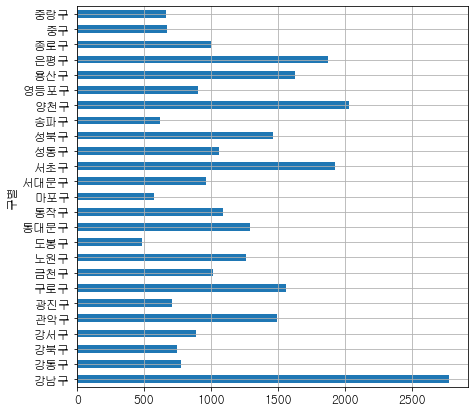

In [92]:
plt.figure(figsize=(7,7))
data_result['소계'].plot(kind='barh',grid=True)
plt.show()

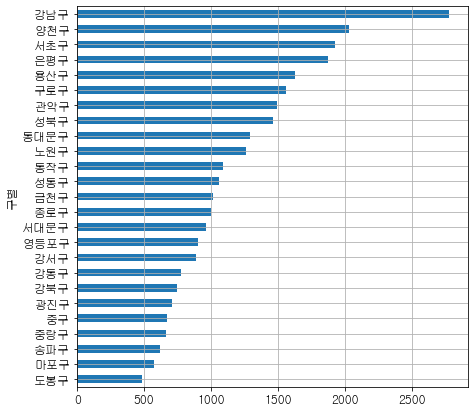

In [93]:
data_result['소계'].sort_values().plot(kind='barh',
                                    grid=True,figsize=(7,7))
plt.show()